In [151]:
using Plots, JLD2, CSV, Printf

import VeryDiffPolyExperiments: map_logfile2network, get_eps_equiv_logfile_name_from_generated_bounds_logfile

In [8]:
function get_logfiles(path; file_filter="", file_filter2="")
    logfiles_generated = readdir(path, join=true)
    logfiles_generated = filter(x -> (contains(x, file_filter) && contains(x, file_filter2)), logfiles_generated)
end


function logfile2netname(logfile)
    basename(map_logfile2network.(logfile))
end

logfile2netname (generic function with 1 method)

In [34]:
function get_ligar_info(logfile)
    rows = CSV.File(logfile, header=false)
    degrees = getindex.(rows, 1)
    bounds  = getindex.(rows, 2)
    times   = getindex.(rows, 3)

    return degrees, bounds, times
end

get_ligar_info (generic function with 1 method)

In [161]:
function make_log_ticks(min_data, max_data)
    ts = []
    cur_exp = Int(floor(log10(min_data)))
    x = 10.0^cur_exp
    while x < max_data
        push!(ts, ((1:9) .* x)...)
        cur_exp += 1
        x = 10.0^cur_exp
    end

    return ts[(ts .>= min_data) .& (ts .<= max_data)]
end

function get_major_log_tick_labels(ticks)
    [isapprox(x, 10.0^round(log10(x))) ? "$(@sprintf("%.0e", x))" : "" for x in ticks] 
end

get_major_log_tick_labels (generic function with 1 method)

In [141]:
min_data

0.9654578030790093

In [160]:
[@sprintf("%.0e", x) for x in  make_log_ticks(min_data, max_data)]

43-element Vector{String}:
 "4e+00"
 "5e+00"
 "6e+00"
 "7e+00"
 "8e+00"
 "9e+00"
 "1e+01"
 "2e+01"
 "3e+01"
 "4e+01"
 ⋮
 "2e+04"
 "3e+04"
 "4e+04"
 "5e+04"
 "6e+04"
 "7e+04"
 "8e+04"
 "9e+04"
 "1e+05"

In [11]:
logfiles_mnist = get_logfiles("../results/mnist", file_filter="2025-04-08")
netnames = logfile2netname.(logfiles_mnist)

results_mnist = Dict(netnames .=> load.(logfiles_mnist))

Dict{String, Dict{String, Any}} with 6 entries:
  "mnist_256x6_1e4.onnx" => Dict("accs"=>Any[0.121867, 0.112367, 0.112367, 0.13…
  "mnist-net_256x4.onnx" => Dict("accs"=>Any[0.107817, 0.09915, 0.09915, 0.0991…
  "mnist-net_256x6.onnx" => Dict("accs"=>Any[0.161417, 0.0986333, 0.0986333, 0.…
  "mnist_256x4_2e5.onnx" => Dict("accs"=>Any[0.163267, 0.18975, 0.15785, 0.2891…
  "mnist_256x4_1e4.onnx" => Dict("accs"=>Any[0.171583, 0.151333, 0.392833, 0.45…
  "mnist_256x6_2e5.onnx" => Dict("accs"=>Any[0.161817, 0.104933, 0.106583, 0.19…

In [58]:
results_mnist[k]

Dict{String, Any} with 7 entries:
  "accs"     => Any[0.171583, 0.151333, 0.392833, 0.4567, 0.810767, 0.826933, 0…
  "nets"     => Any[Network(Layer[Dense{Float32, Adjoint{Float32, ReshapedArray…
  "degrees"  => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  110, 120, 130, 140, 150, 160…
  "mses"     => Any[3152.46, 1210.48, 554.612, 277.857, 169.029, 148.005, 125.1…
  "max_errs" => Any[43.9554, 28.8907, 22.6139, 17.712, 14.5651, 13.3823, 12.334…
  "times"    => Any[21.0292, 21.0189, 21.2585, 21.5166, 21.617, 21.7922, 22.011…
  "maes"     => Any[31.0643, 19.6194, 14.7674, 11.8217, 9.73207, 9.05118, 8.266…

In [12]:
logfiles_mnist_eps = get_logfiles("../results/mnist", file_filter="verified_bounds", file_filter2="2025-04-11T00:27:47")
results_mnist_eps = Dict(netnames .=> load.(logfiles_mnist_eps))

Dict{String, Dict{String, Any}} with 6 entries:
  "mnist_256x6_1e4.onnx" => Dict("∂bounds_all"=>Any[[-206.851 298.526; -284.147…
  "mnist-net_256x4.onnx" => Dict("∂bounds_all"=>Any[[-2.01258e5 2.19088e5; -1.6…
  "mnist-net_256x6.onnx" => Dict("∂bounds_all"=>Any[[-4.32358e7 4.77956e7; -4.0…
  "mnist_256x4_2e5.onnx" => Dict("∂bounds_all"=>Any[[-557.619 964.732; -715.86 …
  "mnist_256x4_1e4.onnx" => Dict("∂bounds_all"=>Any[[-188.268 247.318; -189.126…
  "mnist_256x6_2e5.onnx" => Dict("∂bounds_all"=>Any[[-1321.81 2655.22; -1139.47…

In [46]:
logfiles_ligar_approx = get_logfiles("../results/mnist", file_filter="ligar", file_filter2="approx_global")
logfiles_ligar_cheby  = get_logfiles("../results/mnist", file_filter="ligar", file_filter2="cheby_global")

6-element Vector{String}:
 "../results/mnist/ligar_mnist-net_256x4_cheby_global.csv"
 "../results/mnist/ligar_mnist-net_256x6_cheby_global.csv"
 "../results/mnist/ligar_mnist_256x4_1e4_cheby_global.csv"
 "../results/mnist/ligar_mnist_256x4_2e5_cheby_global.csv"
 "../results/mnist/ligar_mnist_256x6_1e4_cheby_global.csv"
 "../results/mnist/ligar_mnist_256x6_2e5_cheby_global.csv"

In [59]:
results_eps = Dict()
for k in keys(results_mnist_eps)
    k_filter = split(k, ".")[1]  # drop .onnx
    net_files_approx = filter(x -> contains(x, k_filter), logfiles_ligar_approx)
    net_files_cheby  = filter(x -> contains(x, k_filter), logfiles_ligar_cheby)

    @assert length(net_files_approx) == 1
    @assert length(net_files_cheby)  == 1

    degs_approx, bnds_approx, ts_approx = get_ligar_info(net_files_approx[1])
    degs_cheby,  bnds_cheby,  ts_cheby  = get_ligar_info(net_files_cheby[1])

    max_errs = results_mnist[k]["max_errs"]

    @assert all(degs_approx .== degs_cheby) && all(degs_cheby .== results_mnist_eps[k]["degrees"])
    results_eps[k] = Dict("degrees" => results_mnist_eps[k]["degrees"],
                          "∂bounds" => results_mnist_eps[k]["∂bounds"],
                          "∂times"  => results_mnist_eps[k]["times"],
                          "approx_bounds" => bnds_approx,
                          "approx_times"  => ts_approx,
                          "cheby_bounds"  => bnds_cheby,
                          "cheby_times"   => ts_cheby,
                          "max_errs" => max_errs)
    
    
end

In [60]:
results_eps

Dict{Any, Any} with 6 entries:
  "mnist_256x6_1e4.onnx" => Dict{String, Vector}("cheby_bounds"=>[14861.8, 2588…
  "mnist-net_256x4.onnx" => Dict{String, Vector}("cheby_bounds"=>[8.0881e6, 1.6…
  "mnist-net_256x6.onnx" => Dict{String, Vector}("cheby_bounds"=>[8.30441e9, 1.…
  "mnist_256x4_2e5.onnx" => Dict{String, Vector}("cheby_bounds"=>[17506.6, 3046…
  "mnist_256x4_1e4.onnx" => Dict{String, Vector}("cheby_bounds"=>[3293.43, 623.…
  "mnist_256x6_2e5.onnx" => Dict{String, Vector}("cheby_bounds"=>[1.06021e5, 14…

In [61]:
results_eps["mnist_256x6_1e4.onnx"]

Dict{String, Vector} with 8 entries:
  "cheby_bounds"  => [14861.8, 2588.35, 2121.73, 1486.65, 1124.36, 917.043, 811…
  "approx_bounds" => [8138.93, 2679.57, 1557.05, 1091.04, 838.181, 679.963, 571…
  "degrees"       => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  110, 120, 130, 140, 150…
  "∂bounds"       => [705.421, 723.192, 597.407, 404.533, 310.521, 262.597, 226…
  "cheby_times"   => [1.23009, 1.20671, 1.42065, 1.44212, 1.46859, 1.48003, 1.4…
  "max_errs"      => Any[42.0273, 59.0096, 40.4513, 33.2785, 30.2241, 28.0683, …
  "∂times"        => [1.93383, 2.0025, 2.0912, 2.16024, 2.19023, 2.20679, 2.247…
  "approx_times"  => [0.458133, 0.419194, 0.420732, 0.420605, 0.421407, 0.42027…

# Verified Error

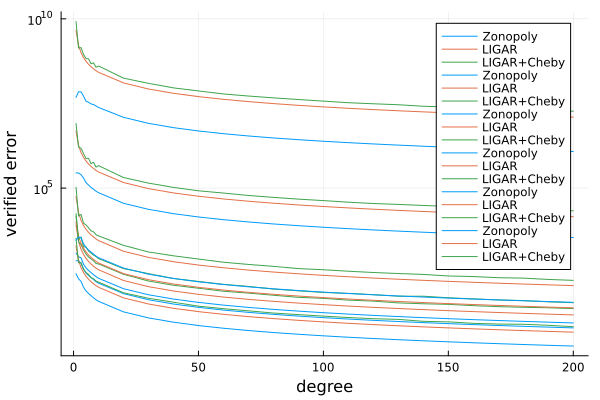

In [53]:
p = plot(xlabel="degree", ylabel="verified error", yscale=:log10)
for k in keys(results_eps)
    kd = results_eps[k]
    degrees = kd["degrees"]
    ∂bounds = kd["∂bounds"]
    approx_bounds = kd["approx_bounds"]
    cheby_bounds = kd["cheby_bounds"]
    plot!(degrees, ∂bounds, label="Zonopoly", color=1)
    plot!(degrees, approx_bounds, label="LIGAR", color=2)
    plot!(degrees, cheby_bounds, label="LIGAR+Cheby", color=3)
end

p

## Individual Networks

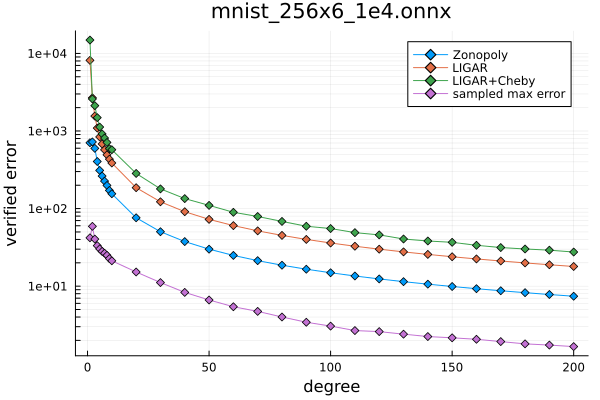

In [169]:
k = collect(keys(results_eps))[1]

kd = results_eps[k]
degrees = kd["degrees"]
∂bounds = kd["∂bounds"]
approx_bounds = kd["approx_bounds"]
cheby_bounds = kd["cheby_bounds"]
max_errs = kd["max_errs"]

min_data = minimum([minimum(∂bounds), minimum(approx_bounds), minimum(cheby_bounds), minimum(max_errs)])
max_data = maximum([maximum(∂bounds), maximum(approx_bounds), maximum(cheby_bounds), maximum(max_errs)])


ytick_positions = make_log_ticks(min_data, max_data) #(1:9) ∪ (10:10:90) ∪ (100:100:1000)
ytick_labels    = get_major_log_tick_labels(ytick_positions)

p = plot(xlabel="degree", ylabel="verified error", yscale=:log10, yticks=(ytick_positions, ytick_labels), title=k)
plot!(degrees, ∂bounds, label="Zonopoly", marker=:diamond, color=1)
plot!(degrees, approx_bounds, label="LIGAR", marker=:diamond, color=2)
plot!(degrees, cheby_bounds, label="LIGAR+Cheby", marker=:diamond, color=3)
plot!(degrees, max_errs, label="sampled max error", marker=:diamond, color=4)

In [170]:
savefig(p, "fig/verified_bound_mnist_256x6_1e4.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/verified_bound_mnist_256x6_1e4.pdf"

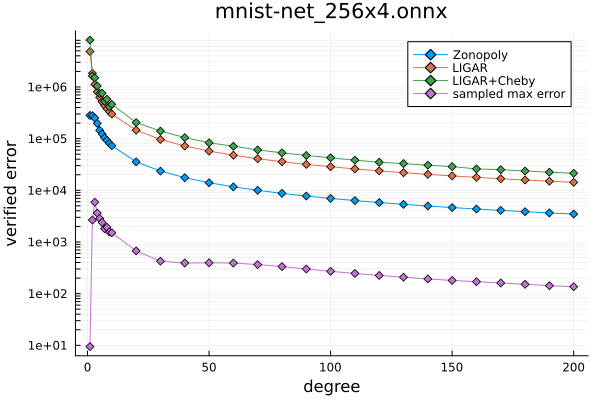

In [171]:
k = collect(keys(results_eps))[2]

kd = results_eps[k]
degrees = kd["degrees"]
∂bounds = kd["∂bounds"]
approx_bounds = kd["approx_bounds"]
cheby_bounds = kd["cheby_bounds"]
max_errs = kd["max_errs"]

min_data = minimum([minimum(∂bounds), minimum(approx_bounds), minimum(cheby_bounds), minimum(max_errs)])
max_data = maximum([maximum(∂bounds), maximum(approx_bounds), maximum(cheby_bounds), maximum(max_errs)])


ytick_positions = make_log_ticks(min_data, max_data) #(1:9) ∪ (10:10:90) ∪ (100:100:1000)
ytick_labels    = get_major_log_tick_labels(ytick_positions)

p = plot(xlabel="degree", ylabel="verified error", yscale=:log10, yticks=(ytick_positions, ytick_labels), title=k)
plot!(degrees, ∂bounds, label="Zonopoly", marker=:diamond, color=1)
plot!(degrees, approx_bounds, label="LIGAR", marker=:diamond, color=2)
plot!(degrees, cheby_bounds, label="LIGAR+Cheby", marker=:diamond, color=3)
plot!(degrees, max_errs, label="sampled max error", marker=:diamond, color=4)

In [172]:
savefig(p, "fig/verified_bound_mnist-net_256x4.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/verified_bound_mnist-net_256x4.pdf"

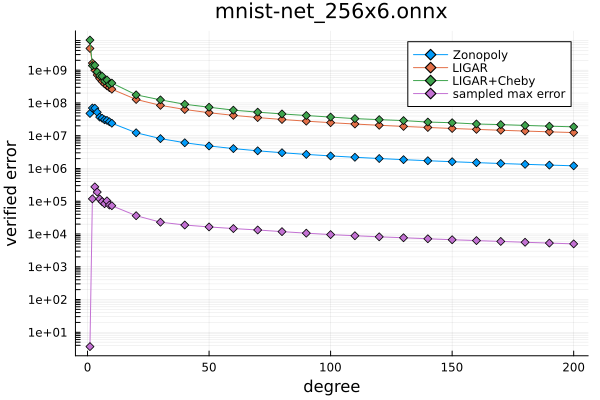

In [173]:
k = collect(keys(results_eps))[3]

kd = results_eps[k]
degrees = kd["degrees"]
∂bounds = kd["∂bounds"]
approx_bounds = kd["approx_bounds"]
cheby_bounds = kd["cheby_bounds"]
max_errs = kd["max_errs"]

min_data = minimum([minimum(∂bounds), minimum(approx_bounds), minimum(cheby_bounds), minimum(max_errs)])
max_data = maximum([maximum(∂bounds), maximum(approx_bounds), maximum(cheby_bounds), maximum(max_errs)])


ytick_positions = make_log_ticks(min_data, max_data) #(1:9) ∪ (10:10:90) ∪ (100:100:1000)
ytick_labels    = get_major_log_tick_labels(ytick_positions)

p = plot(xlabel="degree", ylabel="verified error", yscale=:log10, yticks=(ytick_positions, ytick_labels), title=k)
plot!(degrees, ∂bounds, label="Zonopoly", marker=:diamond, color=1)
plot!(degrees, approx_bounds, label="LIGAR", marker=:diamond, color=2)
plot!(degrees, cheby_bounds, label="LIGAR+Cheby", marker=:diamond, color=3)
plot!(degrees, max_errs, label="sampled max error", marker=:diamond, color=4)

In [174]:
savefig(p, "fig/verified_bound_mnist-net_256x6.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/verified_bound_mnist-net_256x6.pdf"

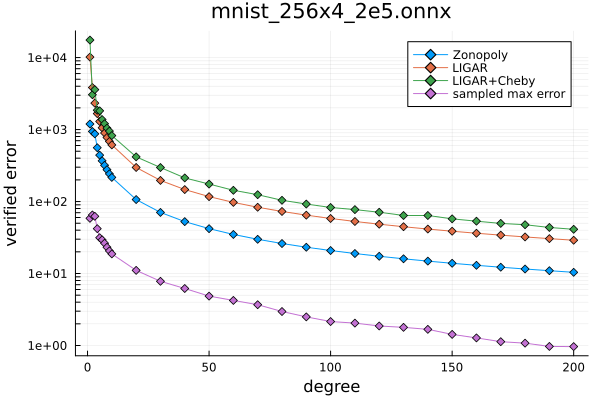

In [175]:
k = collect(keys(results_eps))[4]

kd = results_eps[k]
degrees = kd["degrees"]
∂bounds = kd["∂bounds"]
approx_bounds = kd["approx_bounds"]
cheby_bounds = kd["cheby_bounds"]
max_errs = kd["max_errs"]

min_data = minimum([minimum(∂bounds), minimum(approx_bounds), minimum(cheby_bounds), minimum(max_errs)])
max_data = maximum([maximum(∂bounds), maximum(approx_bounds), maximum(cheby_bounds), maximum(max_errs)])


ytick_positions = make_log_ticks(min_data, max_data) #(1:9) ∪ (10:10:90) ∪ (100:100:1000)
ytick_labels    = get_major_log_tick_labels(ytick_positions)

p = plot(xlabel="degree", ylabel="verified error", yscale=:log10, yticks=(ytick_positions, ytick_labels), title=k)
plot!(degrees, ∂bounds, label="Zonopoly", marker=:diamond, color=1)
plot!(degrees, approx_bounds, label="LIGAR", marker=:diamond, color=2)
plot!(degrees, cheby_bounds, label="LIGAR+Cheby", marker=:diamond, color=3)
plot!(degrees, max_errs, label="sampled max error", marker=:diamond, color=4)

In [176]:
savefig(p, "fig/verified_bound_mnist_256x4_2e5.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/verified_bound_mnist_256x4_2e5.pdf"

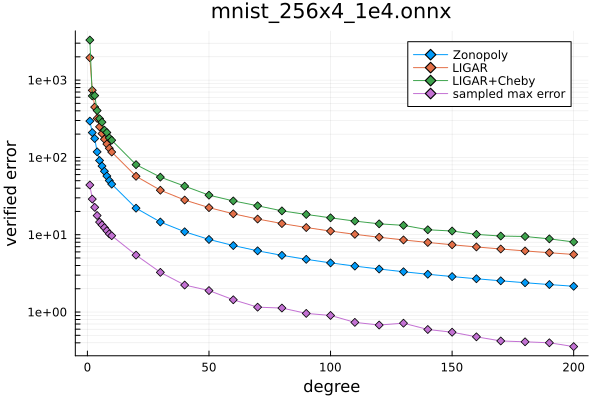

In [177]:
k = collect(keys(results_eps))[5]

kd = results_eps[k]
degrees = kd["degrees"]
∂bounds = kd["∂bounds"]
approx_bounds = kd["approx_bounds"]
cheby_bounds = kd["cheby_bounds"]
max_errs = kd["max_errs"]

min_data = minimum([minimum(∂bounds), minimum(approx_bounds), minimum(cheby_bounds), minimum(max_errs)])
max_data = maximum([maximum(∂bounds), maximum(approx_bounds), maximum(cheby_bounds), maximum(max_errs)])


ytick_positions = make_log_ticks(min_data, max_data) #(1:9) ∪ (10:10:90) ∪ (100:100:1000)
ytick_labels    = get_major_log_tick_labels(ytick_positions)

p = plot(xlabel="degree", ylabel="verified error", yscale=:log10, yticks=(ytick_positions, ytick_labels), title=k)
plot!(degrees, ∂bounds, label="Zonopoly", marker=:diamond, color=1)
plot!(degrees, approx_bounds, label="LIGAR", marker=:diamond, color=2)
plot!(degrees, cheby_bounds, label="LIGAR+Cheby", marker=:diamond, color=3)
plot!(degrees, max_errs, label="sampled max error", marker=:diamond, color=4)

In [178]:
savefig(p, "fig/verified_bound_mnist_256x4_1e4.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/verified_bound_mnist_256x4_1e4.pdf"

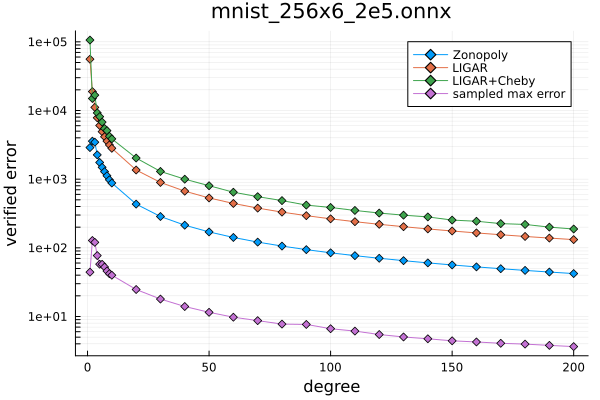

In [179]:
k = collect(keys(results_eps))[6]

kd = results_eps[k]
degrees = kd["degrees"]
∂bounds = kd["∂bounds"]
approx_bounds = kd["approx_bounds"]
cheby_bounds = kd["cheby_bounds"]
max_errs = kd["max_errs"]

min_data = minimum([minimum(∂bounds), minimum(approx_bounds), minimum(cheby_bounds), minimum(max_errs)])
max_data = maximum([maximum(∂bounds), maximum(approx_bounds), maximum(cheby_bounds), maximum(max_errs)])


ytick_positions = make_log_ticks(min_data, max_data) #(1:9) ∪ (10:10:90) ∪ (100:100:1000)
ytick_labels    = get_major_log_tick_labels(ytick_positions)

p = plot(xlabel="degree", ylabel="verified error", yscale=:log10, yticks=(ytick_positions, ytick_labels), title=k)
plot!(degrees, ∂bounds, label="Zonopoly", marker=:diamond, color=1)
plot!(degrees, approx_bounds, label="LIGAR", marker=:diamond, color=2)
plot!(degrees, cheby_bounds, label="LIGAR+Cheby", marker=:diamond, color=3)
plot!(degrees, max_errs, label="sampled max error", marker=:diamond, color=4)

p

In [180]:
savefig(p, "fig/verified_bound_mnist_256x6_2e5.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/verified_bound_mnist_256x6_2e5.pdf"

## All in One Figure

In [240]:
function construct_verified_error_plot(k; legend=true, fontsize=12)
    kd = results_eps[k]
    degrees = kd["degrees"]
    ∂bounds = kd["∂bounds"]
    approx_bounds = kd["approx_bounds"]
    cheby_bounds = kd["cheby_bounds"]
    max_errs = kd["max_errs"]

    min_data = minimum([minimum(∂bounds), minimum(approx_bounds), minimum(cheby_bounds), minimum(max_errs)])
    max_data = maximum([maximum(∂bounds), maximum(approx_bounds), maximum(cheby_bounds), maximum(max_errs)])


    ytick_positions = make_log_ticks(min_data, max_data) #(1:9) ∪ (10:10:90) ∪ (100:100:1000)
    ytick_labels    = get_major_log_tick_labels(ytick_positions)

    p = plot(xlabel="degree", ylabel="verified error", yscale=:log10, yticks=(ytick_positions, ytick_labels), title=k, 
             xguidefontsize=fontsize, yguidefontsize=fontsize)
    plot!(degrees, ∂bounds, label=ifelse(legend, "Zonopoly", false), marker=:diamond, color=1)
    plot!(degrees, approx_bounds, label=ifelse(legend, "LIGAR", false), marker=:diamond, color=2)
    plot!(degrees, cheby_bounds, label=ifelse(legend, "LIGAR+Cheby", false), marker=:diamond, color=3)
    plot!(degrees, max_errs, label=ifelse(legend, "sampled max error", false), marker=:diamond, color=4)

    return p
end

construct_verified_error_plot (generic function with 1 method)

In [231]:
using Measures

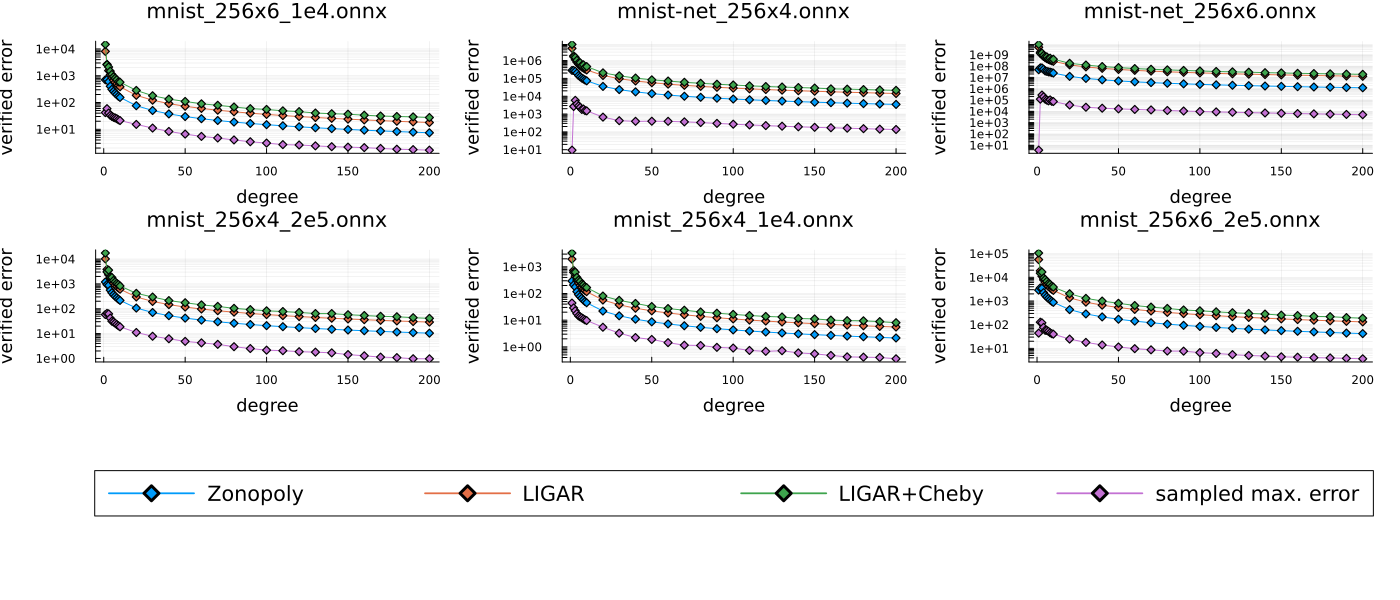

In [242]:
ps = [construct_verified_error_plot(k, legend=false) for k in keys(results_eps)]
lp = plot([0 0 0 0], showaxis=false, grid=false, label=["Zonopoly" "LIGAR" "LIGAR+Cheby" "sampled max. error"], 
            marker=[:diamond :diamond :diamond :diamond], legend_column=4, legend=:inside, xlims=(-2, -1), ylims=(-2, -1),
            legendfontsize=14)

p = plot([ps; lp]..., layout=@layout([A B C; D E F; G]), size=(1400, 600), margin=5mm)

In [243]:
savefig(p, "fig/verified_bounds_mnist_all.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/verified_bounds_mnist_all.pdf"

In [255]:
for k in ["mnist_256x6_1e4.onnx"] #keys(results_eps)
    kd = results_eps[k]
    degrees = kd["degrees"]
    ∂bounds = kd["∂bounds"]
    approx_bounds = kd["approx_bounds"]
    cheby_bounds = kd["cheby_bounds"]
    max_errs = kd["max_errs"]

    println(k)
    println("\tapprox_bounds:           ", approx_bounds[end])
    println("\tcheby_bounds:            ", cheby_bounds[end])
    println("\t∂bounds:                 ", ∂bounds[end])
    println("\tapprox_bounds / ∂bounds: ", (approx_bounds ./ ∂bounds)[end])
    println("\tcheby_bounds / ∂bounds:  ", (cheby_bounds ./ ∂bounds)[end])
end

mnist_256x6_1e4.onnx
	approx_bounds:           17.936005043547013
	cheby_bounds:            27.535228083809816
	∂bounds:                 7.416892755112687
	approx_bounds / ∂bounds: 2.4182640407174807
	cheby_bounds / ∂bounds:  3.712501851240731


# Runtime

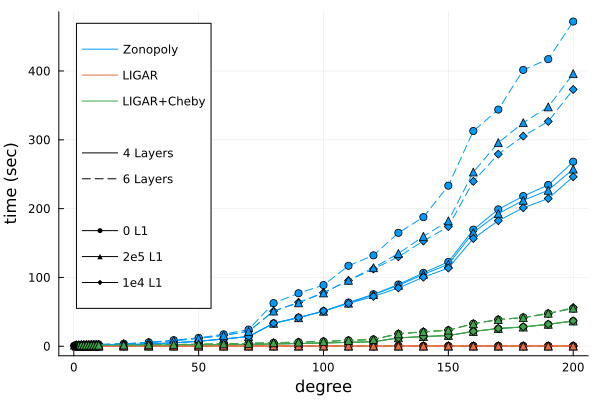

In [244]:
p = plot(xlabel="degree", ylabel="time (sec)")
for k in keys(results_eps)
    kd = results_eps[k]
    degrees = kd["degrees"]
    ∂ts = kd["∂times"]
    approx_ts = kd["approx_times"]
    cheby_ts = kd["cheby_times"]

    if contains(k, "x4")
        linestyle = :solid
    elseif contains(k, "x6")
        linestyle = :dash
    else
        @assert false "Unkown network $k"
    end

    if contains(k, "1e4")
        marker = :diamond
    elseif contains(k, "2e5")
        marker = :utriangle
    elseif contains(k, "-net")
        marker = :circle
    else
        @assert false "Unkown network $k"
    end

    plot!(degrees, ∂ts, label=false, color=1, linestyle=linestyle, marker=marker)
    plot!(degrees, approx_ts, label=false, color=2, linestyle=linestyle, marker=marker)
    plot!(degrees, cheby_ts, label=false, color=3, linestyle=linestyle, marker=marker)
end

# add invisible lines to get separate legends
# different Algos
plot!([0], [1], label="Zonopoly", color=1)
plot!([0], [1], label="LIGAR", color=2)
plot!([0], [1], label="LIGAR+Cheby", color=3)
# newline
plot!([0], [1], label="\n", color=:white)

# different no. layers
plot!([0], [1], label="4 Layers", linestyle=:solid, color=:black)
plot!([0], [1], label="6 Layers", linestyle=:dash, color=:black)
# newline
plot!([0], [1], label="\n", color=:white)

# different L1 weights
plot!([0], [1], label="0 L1", marker=:circle, color=:black)
plot!([0], [1], label="2e5 L1", marker=:utriangle, color=:black)
plot!([0], [1], label="1e4 L1", marker=:diamond, color=:black)

p

In [245]:
savefig(p, "fig/runtime_verification_mnist.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/runtime_verification_mnist.pdf"

# HELOC

In [265]:
logfiles_heloc = get_logfiles("../results/heloc", file_filter="2025-04-11T09:43")
netnames = logfile2netname.(logfiles_heloc)

results_heloc = Dict(netnames .=> load.(logfiles_heloc))

Dict{String, Dict{String, Any}} with 2 entries:
  "heloc.onnx"     => Dict("accs"=>Any[0.521943, 0.582178, 0.517353, 0.561144, …
  "heloc_2e5.onnx" => Dict("accs"=>Any[0.525672, 0.635147, 0.691079, 0.685152, …

In [ ]:
logfiles_heloc_eps = get_logfiles("../results/heloc", file_filter="eps_equiv", file_filter2="2025-04-11T11:09")
netnames = logfile2netname.(logfiles_heloc_eps)
results_heloc_eps  = Dict(netnames .=> load.(logfiles_heloc_eps))

Dict{String, Dict{String, Any}} with 2 entries:
  "heloc.onnx"     => Dict("∂bounds_all"=>Any[[-77.8225 58.8178], [-31.0339 30.…
  "heloc_2e5.onnx" => Dict("∂bounds_all"=>Any[[-27.7956 24.2887], [-10.8142 10.…

In [261]:
logfiles_heloc_ligar_approx = get_logfiles("../results/heloc", file_filter="ligar", file_filter2="approx_global")
logfiles_heloc_ligar_cheby  = get_logfiles("../results/heloc", file_filter="ligar", file_filter2="cheby_global")

2-element Vector{String}:
 "../results/heloc/ligar_heloc_2e5_cheby_global.csv"
 "../results/heloc/ligar_heloc_cheby_global.csv"

In [267]:
results_eps = Dict()
for k in keys(results_heloc_eps)
    k_filter = split(k, ".")[1]  # drop .onnx

    if k_filter == "heloc"
        net_files_approx = filter(x -> contains(x, k_filter) & !contains(x, "_2e5"), logfiles_heloc_ligar_approx)
        net_files_cheby  = filter(x -> contains(x, k_filter) & !contains(x, "_2e5"), logfiles_heloc_ligar_cheby)
    else
        net_files_approx = filter(x -> contains(x, k_filter), logfiles_heloc_ligar_approx)
        net_files_cheby  = filter(x -> contains(x, k_filter), logfiles_heloc_ligar_cheby)
    end

    @assert length(net_files_approx) == 1
    @assert length(net_files_cheby)  == 1

    degs_approx, bnds_approx, ts_approx = get_ligar_info(net_files_approx[1])
    degs_cheby,  bnds_cheby,  ts_cheby  = get_ligar_info(net_files_cheby[1])

    max_errs = results_heloc[k]["max_errs"]

    @assert all(degs_approx .== degs_cheby) && all(degs_cheby .== results_heloc_eps[k]["degrees"])
    results_eps[k] = Dict("degrees" => results_heloc_eps[k]["degrees"],
                          "∂bounds" => results_heloc_eps[k]["∂bounds"],
                          "∂times"  => results_heloc_eps[k]["times"],
                          "approx_bounds" => bnds_approx,
                          "approx_times"  => ts_approx,
                          "cheby_bounds"  => bnds_cheby,
                          "cheby_times"   => ts_cheby,
                          "max_errs" => max_errs)
end

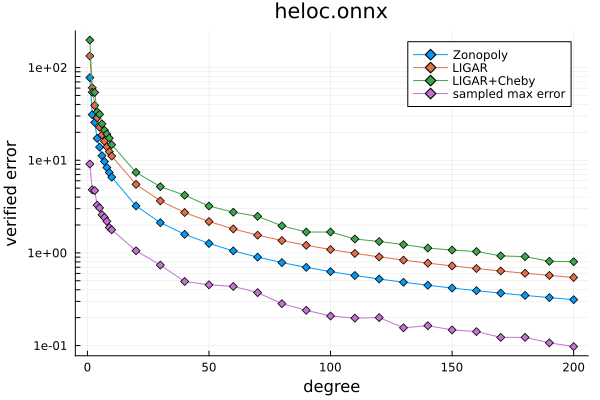

In [283]:
k = collect(keys(results_eps))[1]

kd = results_eps[k]
degrees = kd["degrees"]
∂bounds = kd["∂bounds"]
approx_bounds = kd["approx_bounds"]
cheby_bounds = kd["cheby_bounds"]
max_errs = kd["max_errs"]

min_data = minimum([minimum(∂bounds), minimum(approx_bounds), minimum(cheby_bounds), minimum(max_errs)])
max_data = maximum([maximum(∂bounds), maximum(approx_bounds), maximum(cheby_bounds), maximum(max_errs)])


ytick_positions = make_log_ticks(min_data, max_data) #(1:9) ∪ (10:10:90) ∪ (100:100:1000)
ytick_labels    = get_major_log_tick_labels(ytick_positions)

p = plot(xlabel="degree", ylabel="verified error", yscale=:log10, yticks=(ytick_positions, ytick_labels), title=k)
plot!(degrees, ∂bounds, label="Zonopoly", marker=:diamond, color=1)
plot!(degrees, approx_bounds, label="LIGAR", marker=:diamond, color=2)
plot!(degrees, cheby_bounds, label="LIGAR+Cheby", marker=:diamond, color=3)
plot!(degrees, max_errs, label="sampled max error", marker=:diamond, color=4)

In [285]:
savefig(p, "fig/verified_bounds_heloc.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/verified_bounds_heloc.pdf"

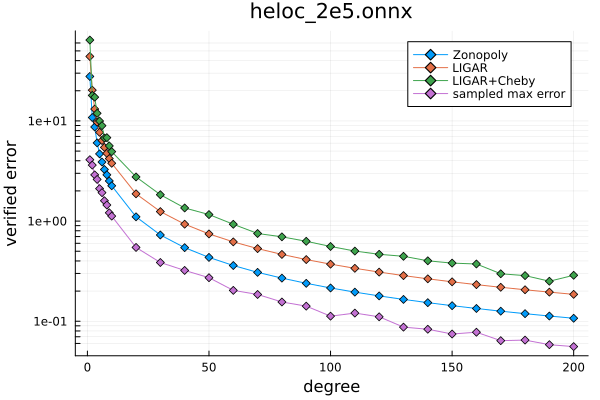

In [286]:
k = collect(keys(results_eps))[2]

kd = results_eps[k]
degrees = kd["degrees"]
∂bounds = kd["∂bounds"]
approx_bounds = kd["approx_bounds"]
cheby_bounds = kd["cheby_bounds"]
max_errs = kd["max_errs"]

min_data = minimum([minimum(∂bounds), minimum(approx_bounds), minimum(cheby_bounds), minimum(max_errs)])
max_data = maximum([maximum(∂bounds), maximum(approx_bounds), maximum(cheby_bounds), maximum(max_errs)])


ytick_positions = make_log_ticks(min_data, max_data) #(1:9) ∪ (10:10:90) ∪ (100:100:1000)
ytick_labels    = get_major_log_tick_labels(ytick_positions)

p = plot(xlabel="degree", ylabel="verified error", yscale=:log10, yticks=(ytick_positions, ytick_labels), title=k)
plot!(degrees, ∂bounds, label="Zonopoly", marker=:diamond, color=1)
plot!(degrees, approx_bounds, label="LIGAR", marker=:diamond, color=2)
plot!(degrees, cheby_bounds, label="LIGAR+Cheby", marker=:diamond, color=3)
plot!(degrees, max_errs, label="sampled max error", marker=:diamond, color=4)

In [287]:
savefig(p, "fig/verified_bounds_heloc_2e5.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/verified_bounds_heloc_2e5.pdf"

## Table for HELOC

In [282]:
for k in keys(results_eps)
    kd = results_eps[k]
    degrees = kd["degrees"]
    ∂bounds = kd["∂bounds"]
    approx_bounds = kd["approx_bounds"]
    cheby_bounds = kd["cheby_bounds"]
    max_errs = kd["max_errs"]

    println(k)
    println("\tapprox_bounds:           ", approx_bounds[end])
    println("\tcheby_bounds:            ", cheby_bounds[end])
    println("\t∂bounds:                 ", ∂bounds[end])
    println("\tapprox_bounds / ∂bounds: ", (approx_bounds ./ ∂bounds)[end])
    println("\tcheby_bounds / ∂bounds:  ", (cheby_bounds ./ ∂bounds)[end])
end

heloc.onnx
	approx_bounds:           0.5424801969240105
	cheby_bounds:            0.8025906857443175
	∂bounds:                 0.31270125070334565
	approx_bounds / ∂bounds: 1.7348194025570183
	cheby_bounds / ∂bounds:  2.5666372742004846
heloc_2e5.onnx
	approx_bounds:           0.18553019200643572
	cheby_bounds:            0.2876306305026044
	∂bounds:                 0.10708680587592932
	approx_bounds / ∂bounds: 1.7325214856197209
	cheby_bounds / ∂bounds:  2.6859576971214643


## Runtime

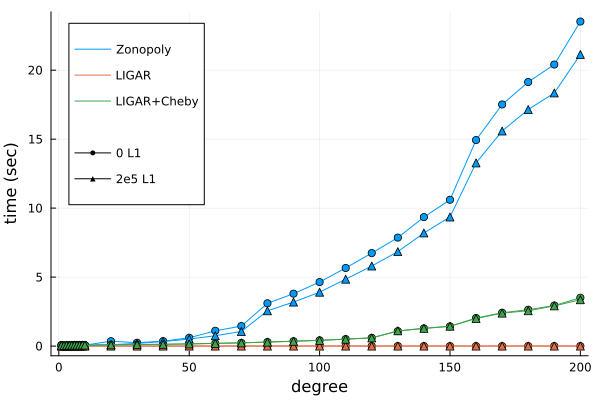

In [288]:
p = plot(xlabel="degree", ylabel="time (sec)", xlims=(-3, 203))

linestyle = :solid

for k in keys(results_eps)
    kd = results_eps[k]
    degrees = kd["degrees"]
    ∂ts = kd["∂times"]
    approx_ts = kd["approx_times"]
    cheby_ts = kd["cheby_times"]

    if contains(k, "1e4")
        marker = :diamond
    elseif contains(k, "2e5")
        marker = :utriangle
    elseif contains(k, "heloc")
        marker = :circle
    else
        @assert false "Unkown network $k"
    end

    plot!(degrees, ∂ts, label=false, color=1, linestyle=linestyle, marker=marker)
    plot!(degrees, approx_ts, label=false, color=2, linestyle=linestyle, marker=marker)
    plot!(degrees, cheby_ts, label=false, color=3, linestyle=linestyle, marker=marker)
end

# add invisible lines to get separate legends
# different Algos
plot!([-5], [1], label="Zonopoly", color=1)
plot!([-5], [1], label="LIGAR", color=2)
plot!([-5], [1], label="LIGAR+Cheby", color=3)
# newline
plot!([-5], [1], label="\n", color=:white)

# different L1 weights
plot!([-5], [1], label="0 L1", marker=:circle, color=:black)
plot!([-5], [1], label="2e5 L1", marker=:utriangle, color=:black)

p

In [289]:
savefig(p, "fig/runtime_verification_heloc.pdf")

"/home/philipp/VerifyNN/VeryDiffPolyExperiments/analysis/fig/runtime_verification_heloc.pdf"